In [1]:
from pathlib import Path

train_images_directory = Path("/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images")
train_labels_path = Path("/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/merged_coco.json")


In [2]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm 
import matplotlib.pyplot as plt
import json
import cv2
import copy
from typing import Optional

In [3]:
!pip install -q pycocotools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycocotools.coco import COCO
from PIL import Image
import json
import random
from pathlib import Path
%matplotlib inline
sns.set_theme(style='darkgrid', palette='deep', font='sans-serif', font_scale=1)

In [4]:
with train_labels_path.open() as f:
    train_dict = json.load(f)

# with test_metadata_path.open() as f:
#     test_dict = json.load(f)

train_coco_labels=COCO(annotation_file=train_labels_path)

loading annotations into memory...
Done (t=6.25s)
creating index...
index created!


In [5]:
def print_columns(_columns, _description):
    print(_description)
    for column in _columns:
        print(column)
    print()

In [6]:
print("There are " + str(len(train_dict['categories'])) + " categories.\n")
# print("There are " + str(len(test_dict['images']) + len(train_dict['images'])) + " images in the dataset.")
print("There are " + str(len(train_dict['images'])) + " images in the train set.")
# print("There are " + str(len(test_dict['images'])) + " images in the test set.\n")
print("There are " + str(len(train_dict['annotations'])) + " annotations in the train set.\n")

print_columns(train_dict.keys(), "Fields in COCO format of train labels:")
print("We will focus on mainly categories, images and annotations.")

There are 6 categories.

There are 2726 images in the train set.
There are 641353 annotations in the train set.

Fields in COCO format of train labels:
info
licenses
images
annotations
categories

We will focus on mainly categories, images and annotations.


/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images/image_20_png.rf.e4c59762bac9a4141f0f8b8d4c329d95.jpg
/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images/image_438_png.rf.2e48f5263dcf775b0165e24b5c7c85f4.jpg
/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images/image_11_png.rf.2dadd3bfac0cecedd30c861ed021b067.jpg
/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images/image_251_png.rf.823bea9e70c528734d9f9e42a66e204b.jpg
/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images/image_81_png.rf.0e72c778538e1a7064f848d68488b351.jpg
/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images/image_198_png.rf.10d4c751aa2909875cf306d0eb5146bd.jpg


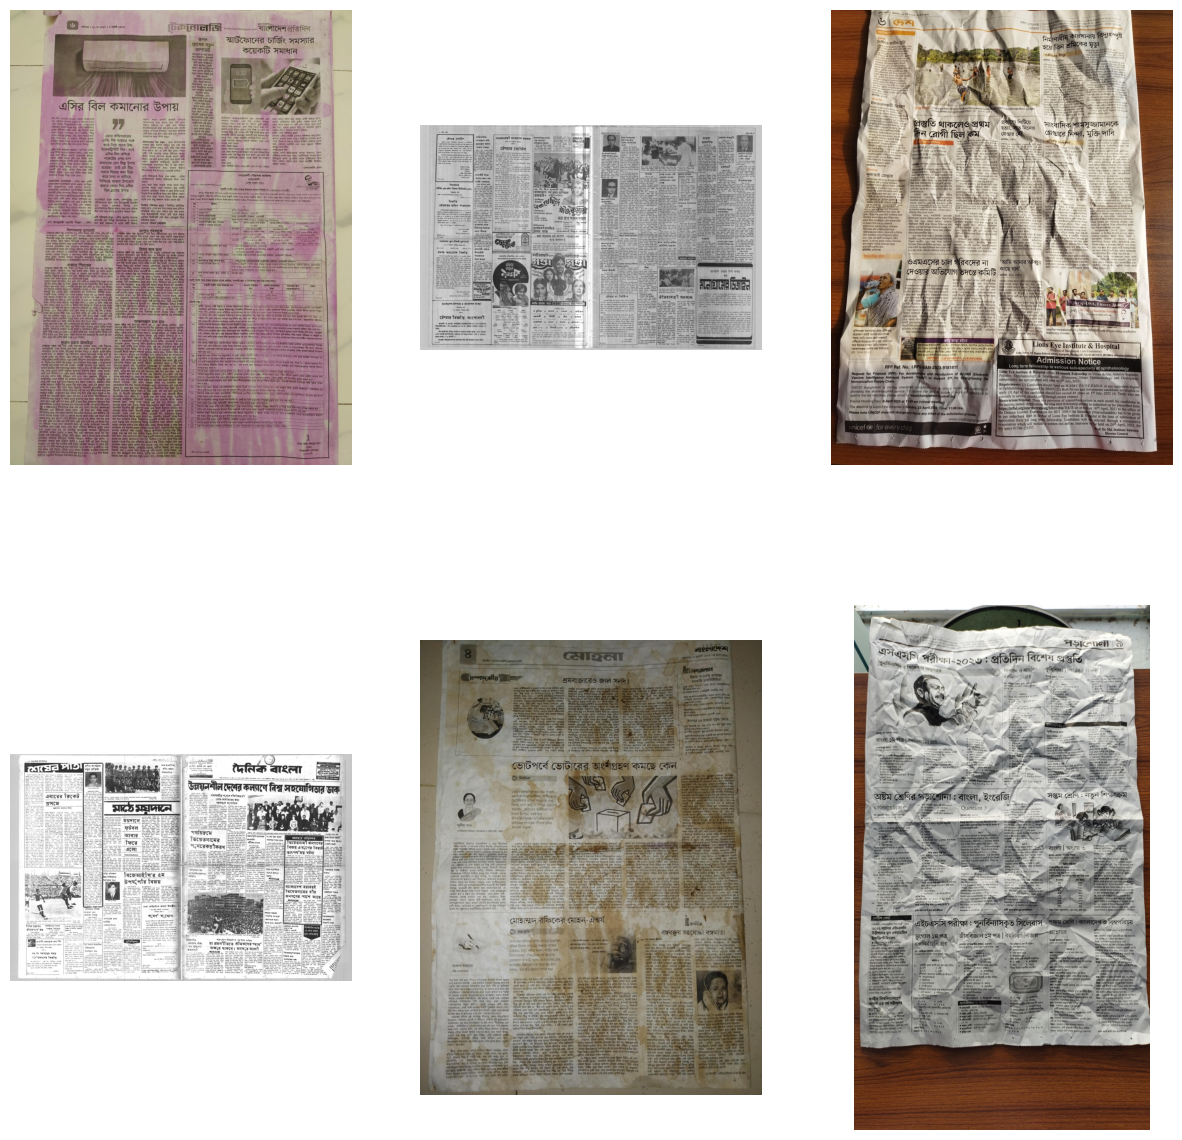

In [9]:
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
from pathlib import Path

# Assuming train_images_directory is a Path object
train_images_directory = Path("/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images")

plt.figure(figsize=(15, 15))
for i in range(6):
    try:
        # Convert the generator to a list and randomly choose an element
        image_file = random.choice(list(train_images_directory.glob('*.jpg')))
        
        print(image_file)
        
        image = Image.open(image_file)
        code = 231 + i
        plt.subplot(code)
        plt.axis('off')
        plt.imshow(np.asarray(image))
    except FileNotFoundError:
        print(f"Image file {image_file} not found.")
    except Exception as e:
        print(f"Error loading image: {e}")

plt.show()


In [10]:
print(len(train_coco_labels.getImgIds()))


2726


In [12]:
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import random
from pathlib import Path

# train_coco_annotations = COCO("/kaggle/working/Newspaper_Layout/train/_annotations.coco.json")
train_coco_annotations= COCO("/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/merged_coco.json")

# train_images_directory = Path("//kaggle/working/Newspaper_Layout/train")
train_images_directory=Path("/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images")

loading annotations into memory...
Done (t=6.76s)
creating index...
index created!


{'id': 1453, 'license': 1, 'file_name': 'image_481_png.rf.e4cee5a379ebe806ce312ab002e88f72.jpg', 'height': 3907, 'width': 2814, 'date_captured': '2024-06-22T20:16:29+00:00'}


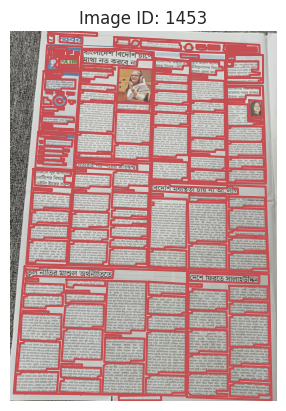

In [14]:
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
from pathlib import Path
import re

def visualize_random_image_with_segmentations(coco_annotations, images_directory):
    try:
        # Generate a random image ID under 2500
        image_id = random.randint(1, 2300)
        
        # Load image information from COCO annotations
        image_info = coco_annotations.loadImgs([image_id])[0]
        print(image_info)
        image_path = train_images_directory / image_info["file_name"]
        image = plt.imread(image_path)
        plt.imshow(image)
        annotation_ids = coco_annotations.getAnnIds(imgIds=[image_id])
#         print(annotation_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)
#         print(annotations)

        for ann in annotations:
            segmentation = ann["segmentation"]
            flattened_segmentation = [coord for pair in segmentation for coord in pair]

            reshaped_segmentation = [(flattened_segmentation[i], flattened_segmentation[i + 1]) for i in range(0, len(flattened_segmentation), 2)]

            xs, ys = zip(*reshaped_segmentation)
            xs, ys = list(xs), list(ys)
            plt.plot(xs + [xs[0]], ys + [ys[0]], color="r")

        plt.title(f"Image ID: {image_id}")
        plt.axis('off')
        plt.show()
        
    except ValueError as ve:
        print(f"Error: {ve} - Image ID: {image_id}")
    except Exception as e:
        print(f"Error loading image: {e}")

# Example usage
train_images_directory = Path('/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images')
visualize_random_image_with_segmentations(train_coco_annotations, train_images_directory)

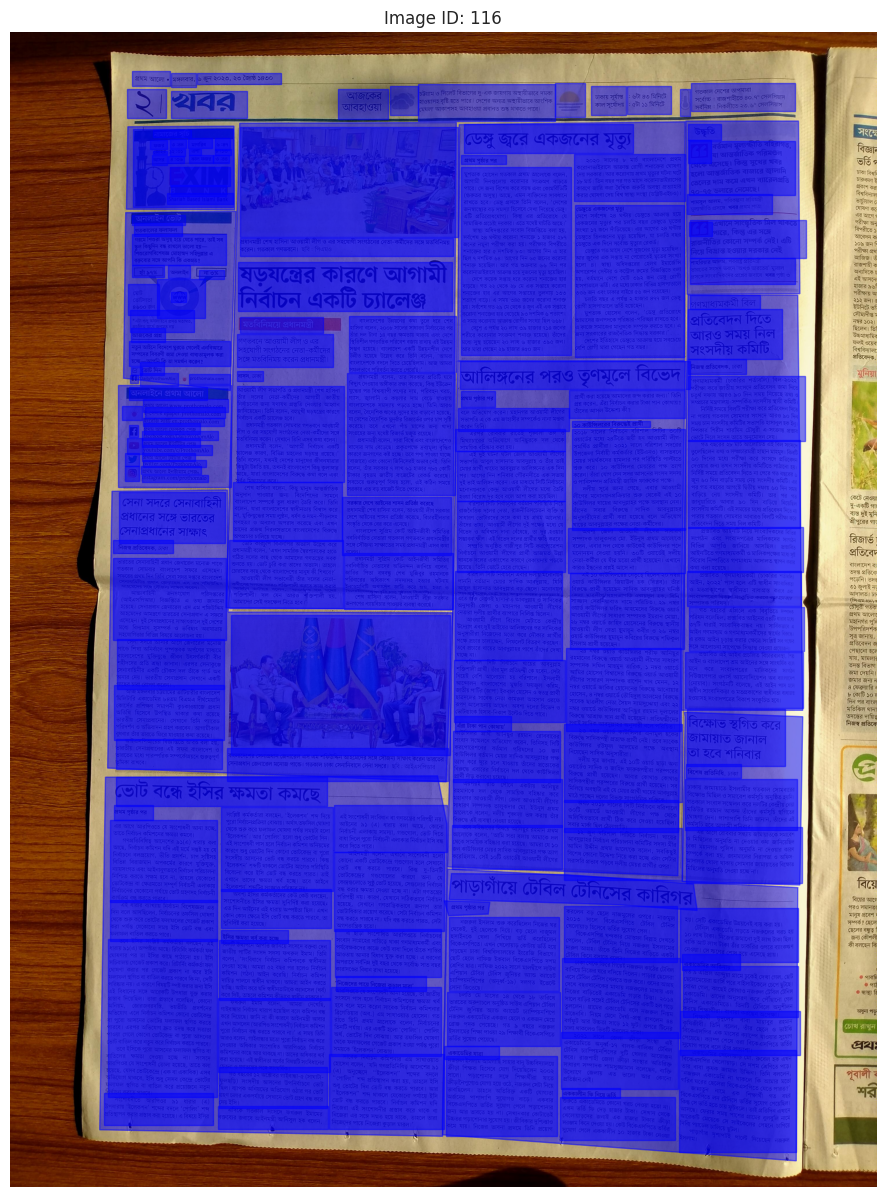

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def visualize_random_image_with_light_bounding_boxes(coco_annotations, figsize=(10, 10)):
    random_image_filename = random.choice(list(train_images_directory.glob('*.jpg')))
    image_id = int(random_image_filename.stem.split('_')[1])

    image_info = coco_annotations.loadImgs([image_id])[0]

    # Load and display the image
    image_path = train_images_directory / image_info["file_name"]
    image = plt.imread(image_path)
    
    plt.figure(figsize=figsize)  # Set the figure size
    plt.imshow(image)
    

    # Load and display segmentations
    annotation_ids = coco_annotations.getAnnIds(imgIds=[image_id])
    annotations = coco_annotations.loadAnns(annotation_ids)

    for ann in annotations:
        segmentation = ann["segmentation"]
        for seg_points in segmentation:
            seg_points = np.array(seg_points).reshape(-1, 2)  # Reshape flat list to pairs of (x, y) coordinates
            
            light_color = (0.0, 0.0, 1.0, 0.5)  # Very light color with low alpha value
            
            poly = Polygon(seg_points, edgecolor=light_color, facecolor=light_color, linewidth=1)
            plt.gca().add_patch(poly)

    plt.title(f"Image ID: {image_id}")
    plt.axis('off')
    plt.show()

# Example usage with larger image size
visualize_random_image_with_light_bounding_boxes(train_coco_annotations, figsize=(15, 15))


In [16]:
def show_image(_image_id):
    image_file = train_coco_labels.loadImgs([_image_id])[0]['file_name']
    image = Image.open(train_images_directory/image_file)
    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(np.asarray(image))
#     plt.savefig("show_image.png")
    

In [17]:
def show_segmentations(_image_id):
    show_image(_image_id)
    annotation_ids = train_coco_labels.getAnnIds(imgIds=[_image_id])
    annotations = train_coco_labels.loadAnns(annotation_ids)
    
    train_coco_labels.showAnns(annotations)

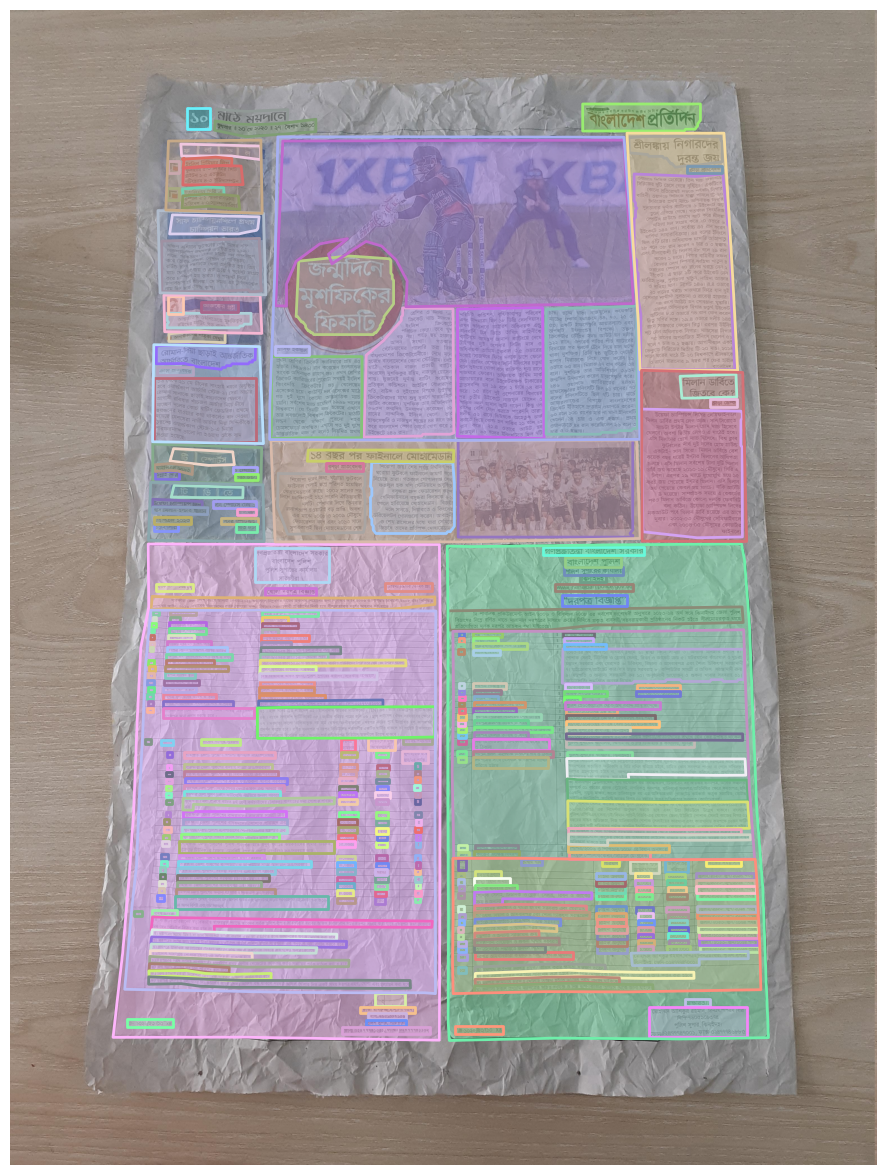

In [18]:
def get_random_image_id(coco_annotations):
    img_ids = list(coco_annotations.imgs.keys())
    return random.choice(img_ids)

# Example usage to generate a random image ID
random_image_id = get_random_image_id(train_coco_annotations)
show_segmentations(random_image_id)

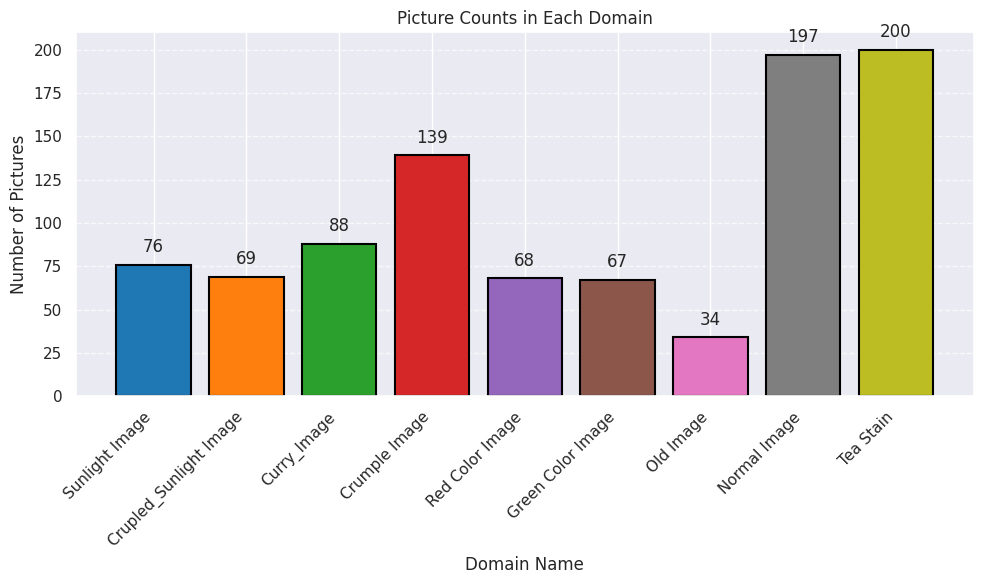

In [19]:
import matplotlib.pyplot as plt

# Sample data - replace this with your actual data
class_counts = {
    'Sunlight Image': 76,
    'Crupled_Sunlight Image': 69,
    'Curry_Image': 88,
    'Crumple Image': 139,
    'Red Color Image': 68,
    'Green Color Image': 67,
    'Old Image': 34,
    'Normal Image': 197,
    'Tea Stain': 200,
}

# Extract class names and counts
classes = list(class_counts.keys())
counts = list(class_counts.values())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

# Plotting the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size
bars = plt.bar(classes, counts, color=colors, edgecolor='black', linewidth=1.5)

# Add counts above each bar
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5, count, ha='center', va='bottom')

plt.xlabel('Domain Name')
plt.ylabel('Number of Pictures')
plt.title('Picture Counts in Each Domain')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
# plt.savefig("picture_count_domainwise.jpg", bbox_inches='tight')  # Save the figure with tight bounding box

In [20]:
train_coco_annotations = COCO("/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/merged_coco.json")

train_images_directory = Path("/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images")
import random

# Function to get a random image ID from the COCO annotations
def get_random_image_id(coco_annotations):
    img_ids = list(coco_annotations.imgs.keys())
    return random.choice(img_ids)

# Example usage to generate a random image ID
random_image_id = get_random_image_id(train_coco_annotations)
print("Random Image ID:", random_image_id)



def show_binary_mask(_image_id, _category_id):
    annotation_ids = train_coco_labels.getAnnIds(imgIds=[_image_id], catIds=[_category_id])
    annotations = train_coco_labels.loadAnns(annotation_ids)
#     print(annotations)
    image_height = train_coco_labels.loadImgs([_image_id])[0]['height']
    image_width = train_coco_labels.loadImgs([_image_id])[0]['width']
    binary_mask=np.zeros((image_height, image_width))
    for annotation in annotations:
        current_mask=train_coco_labels.annToMask(annotation)
        binary_mask += current_mask
    plt.axis('off')
    plt.imshow(binary_mask)

def show_categorywise_binary_mask(_image_id):
    plt.figure(figsize=(15, 15))
    
    plt.subplot(231)
    plt.title('Image')
    plt.savefig("Image_Binary.png")
    show_binary_mask(_image_id, 1)
    
    plt.subplot(232)
    plt.title('News')
    plt.savefig("News_Binary.png")
    show_binary_mask(_image_id, 2)
    
    plt.subplot(233)
    plt.title('Paragraph')
    plt.savefig("Paragraph_Binary.png")
    show_binary_mask(_image_id, 3)
    
    plt.subplot(234)
    plt.title('Table')
    plt.savefig("Table_Binary.png")
    show_binary_mask(_image_id, 4)
    
    plt.subplot(235)
    plt.title('Text Box')
    plt.savefig("Text_Binary.png")
    show_binary_mask(_image_id, 5)

    plt.show()

loading annotations into memory...
Done (t=6.08s)
creating index...
index created!
Random Image ID: 289


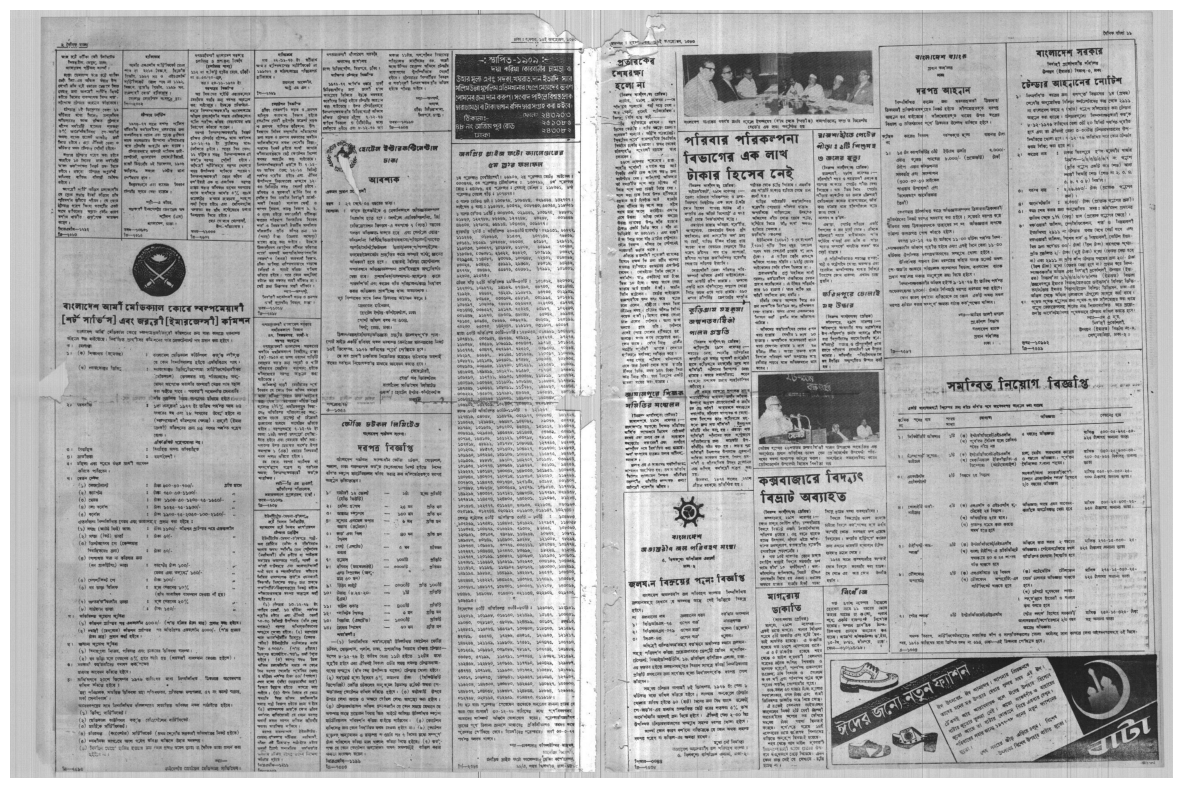

In [21]:
show_image(289)


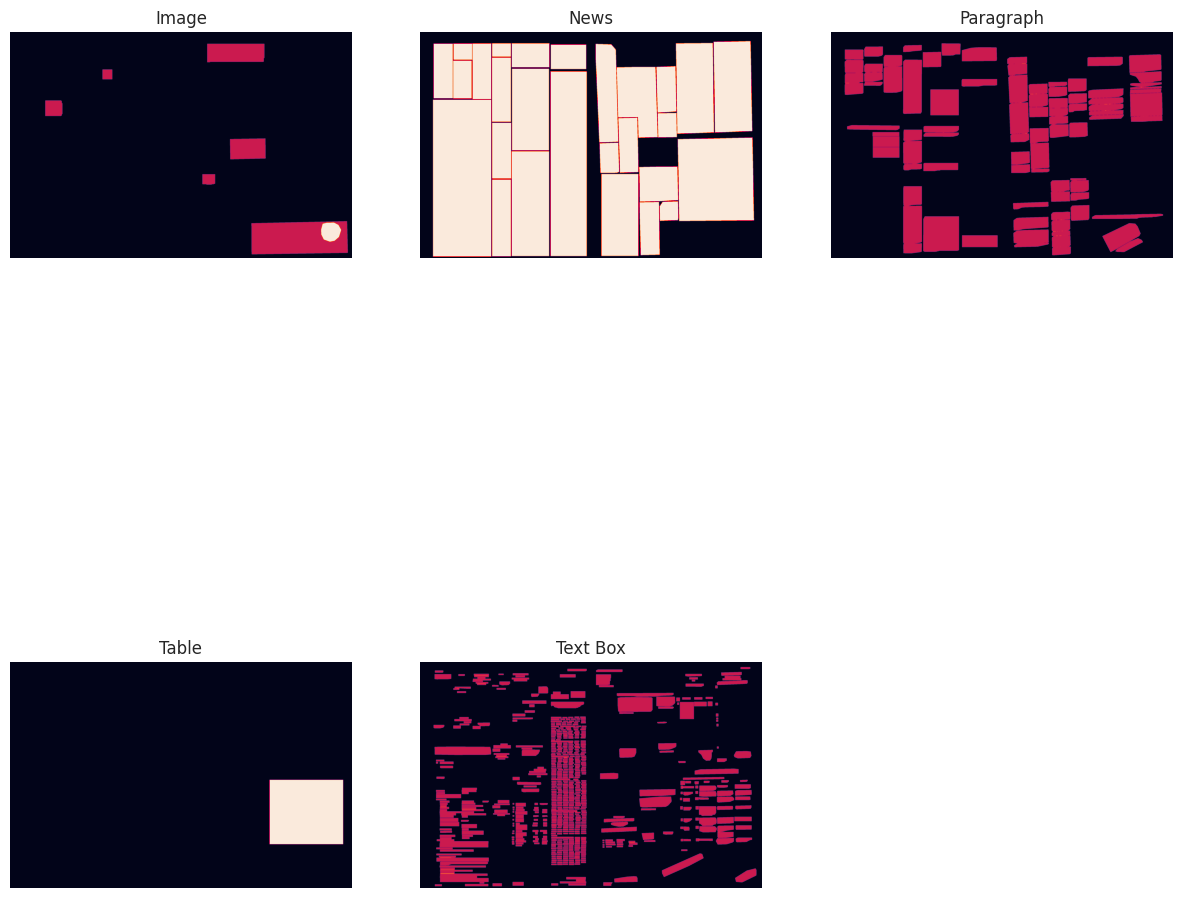

In [22]:
show_categorywise_binary_mask(289)


In [23]:
train_categories = pd.DataFrame(train_dict['categories'])
train_categories.head()

id       name supercategory
0   0       news          none
1   1      image          news
2   2       news          news
3   3  paragraph          news
4   4      table          news

In [24]:
train_categories.drop(0)


id       name supercategory
1   1      image          news
2   2       news          news
3   3  paragraph          news
4   4      table          news
5   5   text-box          news

In [25]:
train_images = pd.DataFrame(train_dict["images"])
train_images.head()

id  license                                          file_name  height  \
0   0        1  image_249_png.rf.24e6802439adcea910092682ce070...    4608   
1   1        1  image_232_png.rf.206a044d134b5893141ae01bf4a42...    4608   
2   2        1  image_202_png.rf.14185520c66db852b1c1a0f12b9aa...    4000   
3   3        1  image_198_png.rf.10d4c751aa2909875cf306d0eb514...    4608   
4   4        1  image_165_png.rf.054e36e83984ebbe210819bbbed0a...    4032   

   width              date_captured  
0   2592  2024-06-21T22:35:46+00:00  
1   2592  2024-06-21T22:35:46+00:00  
2   3000  2024-06-21T22:35:46+00:00  
3   2592  2024-06-21T22:35:46+00:00  
4   3024  2024-06-21T22:35:46+00:00

In [26]:
print("\nDropping license and date_captured.\nRenaming id to image_id.\n")
train_images.drop(['license', 'date_captured'], axis=1, inplace=True)
train_images.rename(columns={"id":"image_id"}, inplace=True)
print("train_images shape: " + str(train_images.shape) + "\n")
train_images.head(5)


Dropping license and date_captured.
Renaming id to image_id.

train_images shape: (2726, 4)



image_id                                          file_name  height  width
0         0  image_249_png.rf.24e6802439adcea910092682ce070...    4608   2592
1         1  image_232_png.rf.206a044d134b5893141ae01bf4a42...    4608   2592
2         2  image_202_png.rf.14185520c66db852b1c1a0f12b9aa...    4000   3000
3         3  image_198_png.rf.10d4c751aa2909875cf306d0eb514...    4608   2592
4         4  image_165_png.rf.054e36e83984ebbe210819bbbed0a...    4032   3024

In [27]:
#adding area and aspect_ratio
print("\nAdding area and aspect_ratio of images.\n")
train_images['area']=train_images['height']*train_images['width']
train_images['aspect_ratio']=train_images['height']/train_images['width']
train_images.head()


Adding area and aspect_ratio of images.



image_id                                          file_name  height  width  \
0         0  image_249_png.rf.24e6802439adcea910092682ce070...    4608   2592   
1         1  image_232_png.rf.206a044d134b5893141ae01bf4a42...    4608   2592   
2         2  image_202_png.rf.14185520c66db852b1c1a0f12b9aa...    4000   3000   
3         3  image_198_png.rf.10d4c751aa2909875cf306d0eb514...    4608   2592   
4         4  image_165_png.rf.054e36e83984ebbe210819bbbed0a...    4032   3024   

       area  aspect_ratio  
0  11943936      1.777778  
1  11943936      1.777778  
2  12000000      1.333333  
3  11943936      1.777778  
4  12192768      1.333333

In [28]:
train_images.describe()


image_id       height        width          area  aspect_ratio
count  2726.000000  2726.000000  2726.000000  2.726000e+03   2726.000000
mean   1362.500000  3157.724505  2759.173147  8.942348e+06      1.158475
std     787.072741  1119.324012   477.357558  4.857408e+06      0.393975
min       0.000000  1440.000000  1080.000000  1.555200e+06      0.625654
25%     681.250000  1811.000000  2714.000000  5.000238e+06      0.665070
50%    1362.500000  3384.000000  2781.000000  7.544578e+06      1.333333
75%    2043.750000  4032.000000  3024.000000  1.219277e+07      1.333444
max    2725.000000  8160.000000  6144.000000  5.013504e+07      2.173913

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Aspect Ratio vs Image Count Line Plot'}, xlabel='aspect_ratio', ylabel='image_count'>

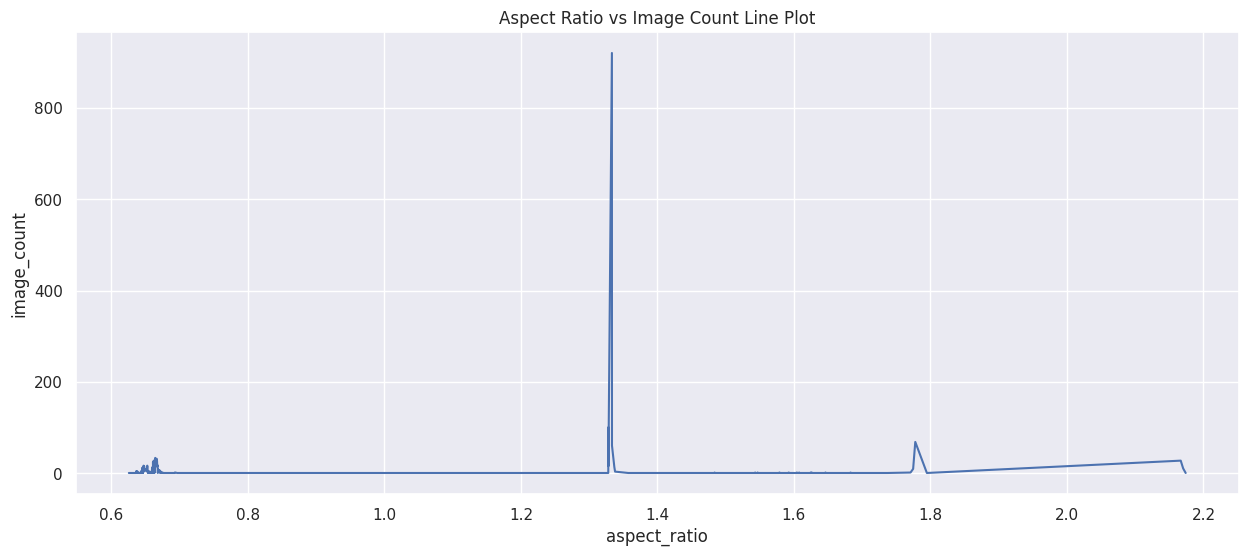

In [29]:
train_images_aspect_ratio_count = train_images.groupby('aspect_ratio', as_index=False)['image_id'].nunique()
train_images_aspect_ratio_count.rename(columns={'image_id':'image_count'}, inplace=True)

plt.figure(figsize=(15, 6))
plt.title("Aspect Ratio vs Image Count Line Plot")
sns.lineplot(x=train_images_aspect_ratio_count['aspect_ratio'], y = train_images_aspect_ratio_count['image_count'])

In [30]:
print("\nTop 10 aspect ratios having maximum image count.\n")
train_images_aspect_ratio_count.sort_values(by='image_count', ascending=False,inplace=True)
train_images_aspect_ratio_count.head(10)


Top 10 aspect ratios having maximum image count.



aspect_ratio  image_count
158      1.333333          920
156      1.328125          101
672      1.777778           69
159      1.333444           61
96       0.664333           34
102      0.666544           32
101      0.666175           32
100      0.665807           32
674      2.166667           28
87       0.662122           28

In [31]:
train_annotations = pd.DataFrame(train_dict['annotations'])
train_annotations.head()
# train_annotations["category_id"].unique()

id  image_id  category_id                          bbox         area  \
0   0         0            5      [1378, 341, 235, 106.25]    24968.750   
1   1         0            2        [515, 490, 1165, 1716]  1999140.000   
2   2         0            3  [1618, 324, 722.525, 133.75]    96637.719   
3   3         0            2   [1351, 309, 998.75, 163.75]   163545.313   
4   4         0            5    [1619, 468, 362.5, 128.75]    46671.875   

                                        segmentation  iscrowd  
0  [[1377.5, 341.255, 1612.5, 341.255, 1612.5, 44...        0  
1  [[1616, 490, 529, 510, 525, 904, 528, 1366, 51...        0  
2  [[2107.5, 427.5, 1891.25, 431.25, 1630, 457.5,...        0  
3  [[1351.275, 323.75, 1362.525, 457.5, 1632.525,...        0  
4  [[1618.775, 487.5, 1782.525, 467.5, 1970.025, ...        0

In [32]:
# adding bbox_area and bbox_aspect_ratio
print("\nRenaming id to annotation_id.\nAdding bbox_area, bbox_aspect_ratio.\n")
train_annotations.rename(columns={"id":"annotation_id"}, inplace=True)
bbox_area=[]
bbox_aspect_ratio=[]
for idx in train_annotations.index:
    bbox_area.append(train_annotations['bbox'][idx][3]*train_annotations['bbox'][idx][2])
    bbox_aspect_ratio.append(train_annotations['bbox'][idx][3]/train_annotations['bbox'][idx][2])
train_annotations['bbox_area']=bbox_area
train_annotations['bbox_aspect_ratio']=bbox_aspect_ratio
print("train_annotations shape: " + str(train_annotations.shape) + "\n")
train_annotations["category_id"].unique()
train_annotations.head()


Renaming id to annotation_id.
Adding bbox_area, bbox_aspect_ratio.

train_annotations shape: (641353, 9)



annotation_id  image_id  category_id                          bbox  \
0              0         0            5      [1378, 341, 235, 106.25]   
1              1         0            2        [515, 490, 1165, 1716]   
2              2         0            3  [1618, 324, 722.525, 133.75]   
3              3         0            2   [1351, 309, 998.75, 163.75]   
4              4         0            5    [1619, 468, 362.5, 128.75]   

          area                                       segmentation  iscrowd  \
0    24968.750  [[1377.5, 341.255, 1612.5, 341.255, 1612.5, 44...        0   
1  1999140.000  [[1616, 490, 529, 510, 525, 904, 528, 1366, 51...        0   
2    96637.719  [[2107.5, 427.5, 1891.25, 431.25, 1630, 457.5,...        0   
3   163545.313  [[1351.275, 323.75, 1362.525, 457.5, 1632.525,...        0   
4    46671.875  [[1618.775, 487.5, 1782.525, 467.5, 1970.025, ...        0   

      bbox_area  bbox_aspect_ratio  
0  2.496875e+04           0.452128  
1  1.999140e+06           1.472961  
2  9.663772e+04           0.185115  
3  1.635453e+05           0.163955  
4  4.667188e+04           0.355172

In [33]:
train_annotations.describe()


annotation_id       image_id    category_id          area   iscrowd  \
count  641353.000000  641353.000000  641353.000000  6.413530e+05  641353.0   
mean   320676.000000    1505.651300       3.990771  5.571663e+04       0.0   
std    185142.807935     784.036854       1.244552  2.301199e+05       0.0   
min         0.000000       0.000000       1.000000  2.000000e-03       0.0   
25%    160338.000000     826.000000       3.000000  1.875000e+03       0.0   
50%    320676.000000    1636.000000       5.000000  9.038158e+03       0.0   
75%    481014.000000    2176.000000       5.000000  3.568146e+04       0.0   
max    641352.000000    2725.000000       5.000000  4.082424e+07       0.0   

          bbox_area  bbox_aspect_ratio  
count  6.413530e+05      641353.000000  
mean   5.571663e+04           0.575569  
std    2.301199e+05           1.662921  
min    2.400000e-03           0.002917  
25%    1.875000e+03           0.191397  
50%    9.038119e+03           0.343517  
75%    3.568146e+04           0.696318  
max    4.082423e+07         852.000000

In [34]:
# print(train_categories["name"])
# train_categories=train_categories.drop(0)
print(train_categories)

   id       name supercategory
0   0       news          none
1   1      image          news
2   2       news          news
3   3  paragraph          news
4   4      table          news
5   5   text-box          news


In [43]:
category_mapping = {
    1: 'image',
    2: 'news',
    3: 'paragraph',
    4: 'table',
    5: 'text box'
}

img_cat_count['category_name'] = img_cat_count['category_id'].map(category_mapping)
img_cat_count

image_id  category_id category_name
0              0            5      text box
1              0            2          news
2              0            3     paragraph
3              0            2          news
4              0            5      text box
...          ...          ...           ...
641348      2725            2          news
641349      2725            2          news
641350      2725            2          news
641351      2725            2          news
641352      2725            2          news

[641353 rows x 3 columns]

In [47]:
train_categories = pd.DataFrame(train_dict['categories'])
train_categories.head(10)

id       name supercategory
0   0       news          none
1   1      image          news
2   2       news          news
3   3  paragraph          news
4   4      table          news
5   5   text-box          news

In [48]:
img_cat_count = train_annotations[['image_id', 'category_id']].copy()
print(img_cat_count["category_id"].unique())
category_names=[]
for idx in img_cat_count.index:
    category_names.append(train_categories['name'][img_cat_count['category_id'][idx]])
# print(category_names)
img_cat_count['category_name']=category_names
img_cat_count[train_categories['name'][1]] = img_cat_count['category_id'] == train_categories['id'][1]
img_cat_count[train_categories['name'][2]] = img_cat_count['category_id'] == train_categories['id'][2]
img_cat_count[train_categories['name'][3]] = img_cat_count['category_id'] == train_categories['id'][3]
img_cat_count[train_categories['name'][4]] = img_cat_count['category_id'] == train_categories['id'][4]
img_cat_count[train_categories['name'][5]] = img_cat_count['category_id'] == train_categories['id'][5]
img_cat_count.head()
img_cat_count['category_name'] = img_cat_count['category_id'].map(category_mapping)

[5 2 3 1 4]


In [39]:
train_categories["name"][1]


'image'

In [40]:
img_cat_count["category_id"]


0         5
1         2
2         3
3         2
4         5
         ..
641348    2
641349    2
641350    2
641351    2
641352    2
Name: category_id, Length: 641353, dtype: int64

In [41]:
# img_cat_count.groupby('category_id', as_index=False)["image_id"].unique()

# categorywise_image_count['category_name']=train_categories['name']
# categorywise_image_count
# Group by category_name and sum the boolean values in each category column
category_counts =img_cat_count.groupby('category_name').sum()

# Display the total counts for each category
print(category_counts)

                image_id  category_id
category_name                        
image           33588360        25645
news            75053410        99328
paragraph      295815114       590469
table            2904753         8216
text-box       558292341      1835835


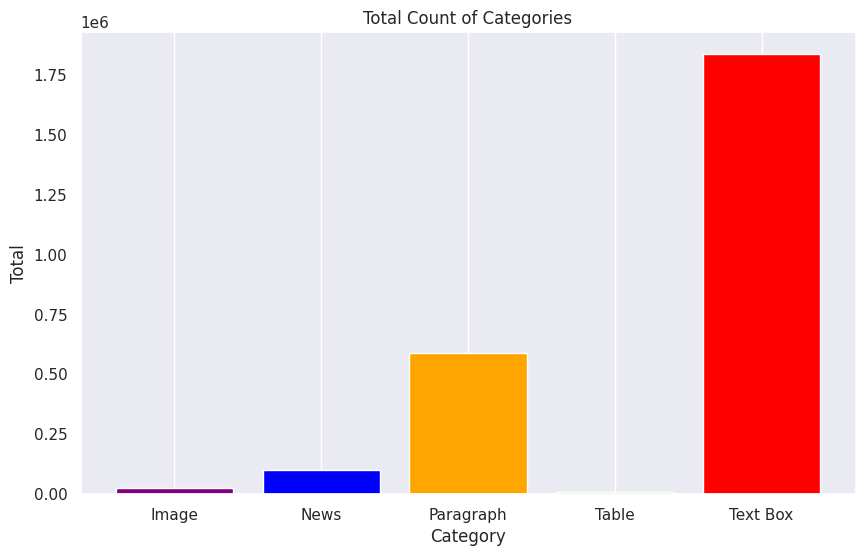

In [52]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding totals from the given data
categories = ['Image', 'News', 'Paragraph', 'Table', 'Text Box']
totals = [25645, 99328, 590469, 8216, 1835835]

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, totals, color=['purple', 'blue', 'orange', 'green', 'red'])

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Total')
plt.title('Total Count of Categories')
plt.grid(axis='y')

# Show plot
plt.show()


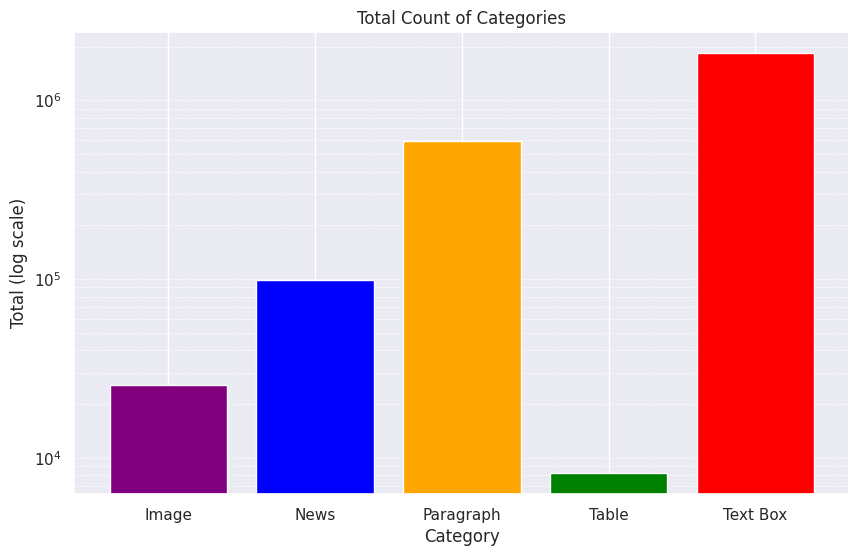

In [50]:
import matplotlib.pyplot as plt

# Define the categories and their corresponding totals from the given data
categories = ['Image', 'News', 'Paragraph', 'Table', 'Text Box']
totals = [25645, 99328, 590469, 8216, 1835835]

# Create the bar plot with a logarithmic scale on the y-axis
plt.figure(figsize=(10, 6))
plt.bar(categories, totals, color=['purple', 'blue', 'orange', 'green', 'red'])
plt.yscale('log')

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Total (log scale)')
plt.title('Total Count of Categories')
plt.grid(axis='y', which='both', linestyle='--', linewidth=0.5)

# Show plot
plt.show()


loading annotations into memory...
Done (t=6.01s)
creating index...
index created!


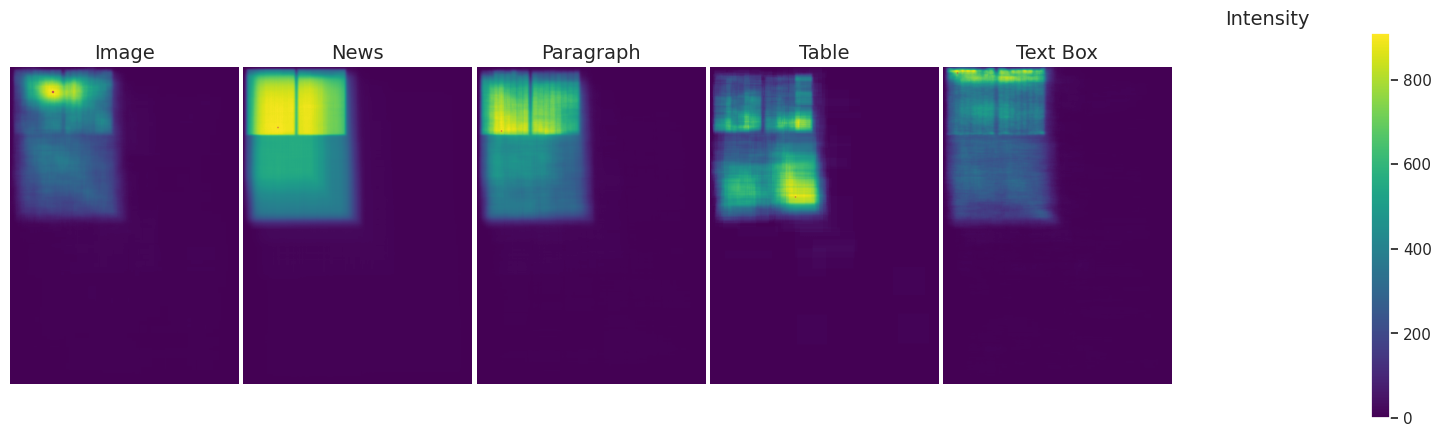

<Figure size 640x480 with 0 Axes>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from pycocotools.coco import COCO
from pathlib import Path

train_coco_annotations = COCO("/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/merged_coco.json")
train_images_directory = Path("/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images")
category_id_to_name = {
    1: "Image",
    2: "News",
    3: "Paragraph",
    4: "Table",
    5: "Text Box"
}

def visualize_annotations_heatmap(coco_annotations, target_class_ids):
    # Define colormap for the heatmap
    cmap = 'viridis'

    # Initialize maximum coordinates of bounding boxes
    max_x, max_y = 0, 0

    # Iterate over each image
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update maximum coordinates of bounding boxes
        for ann in annotations:
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            max_x = max(max_x, bbox_x_end)
            max_y = max(max_y, bbox_y_end)

    # Determine heatmap size based on maximum coordinates
    heatmap_size = (int(max_y) + 20, int(max_x) + 20)  # Add some padding for better visualization

    # Initialize heatmaps for each class
    heatmaps = [np.zeros(heatmap_size) for _ in range(len(target_class_ids))]

    # Iterate over each image again to update heatmaps
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update heatmap for each class
        for ann in annotations:
            category_id = ann['category_id']
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            # Update heatmap counts for each pixel within the bounding box
            heatmaps[target_class_ids.index(category_id)][int(bbox_y):int(bbox_y_end), int(bbox_x):int(bbox_x_end)] += 1

    # Plot the heatmaps
    fig, axes = plt.subplots(1, len(target_class_ids) + 1, figsize=(18, 5))
    plt.subplots_adjust(wspace=0.02)
    for i, (heatmap, class_id) in enumerate(zip(heatmaps, target_class_ids)):
        axes[i].imshow(heatmap, cmap=cmap)
        axes[i].set_title(category_id_to_name[class_id],fontsize=14)  # Use category name based on the dictionary
        axes[i].axis('off')

        # Add bounding box for visualization
        max_value = np.max(heatmap)
        max_index = np.argmax(heatmap)
        max_y, max_x = np.unravel_index(max_index, heatmap.shape)
        max_bbox = Rectangle((max_x-10, max_y-10), 20, 20, linewidth=1, edgecolor='r', facecolor='none')
        axes[i].add_patch(max_bbox)
    
    # Plot colorbar for the heatmap
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array(heatmaps[0])  # Use the first heatmap to determine the color range
    plt.colorbar(sm, ax=axes[-1], orientation='vertical')
    plt.subplots_adjust(wspace=0.02)
    axes[-1].axis('off')
    axes[-1].set_title('Intensity',fontsize=14)

    plt.show()
    plt.savefig("heatmap.png")

# Example usage with classes 1, 2, 3, 4, and 5
target_class_ids = [1, 2, 3, 4, 5]
visualize_annotations_heatmap(train_coco_annotations, target_class_ids)

loading annotations into memory...
Done (t=7.76s)
creating index...
index created!


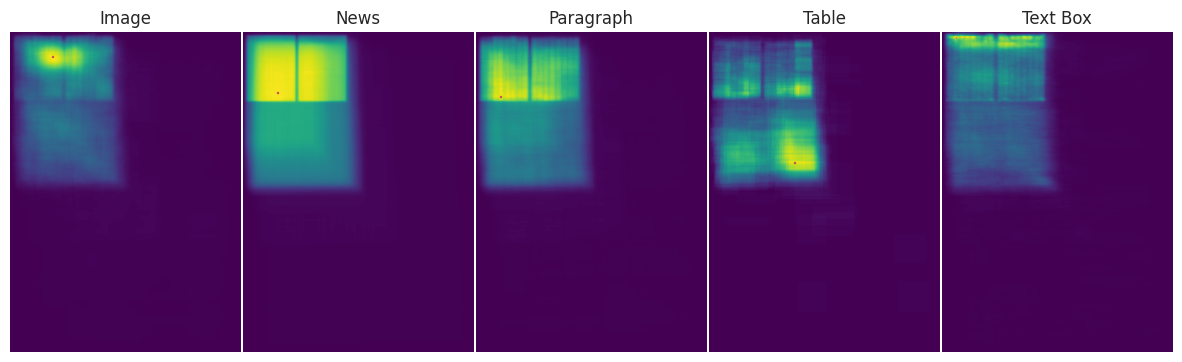

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from pycocotools.coco import COCO
from pathlib import Path

train_coco_annotations = COCO("//kaggle/input/banlad2599-bangla-newspaper-layout-dataset/merged_coco.json")
train_images_directory = Path("/kaggle/input/banlad2599-bangla-newspaper-layout-dataset/All_Crumpled_Images")

category_id_to_name = {
    1: "Image",
    2: "News",
    3: "Paragraph",
    4: "Table",
    5: "Text Box"
}

def visualize_annotations_heatmap(coco_annotations, target_class_ids):
    # Define colormap for the heatmap
    cmap = 'viridis'

    # Initialize maximum coordinates of bounding boxes
    max_x, max_y = 0, 0

    # Iterate over each image
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update maximum coordinates of bounding boxes
        for ann in annotations:
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            max_x = max(max_x, bbox_x_end)
            max_y = max(max_y, bbox_y_end)

    # Determine heatmap size based on maximum coordinates
    heatmap_size = (int(max_y) + 20, int(max_x) + 20)  # Add some padding for better visualization

    # Initialize heatmaps for each class
    heatmaps = [np.zeros(heatmap_size) for _ in range(len(target_class_ids))]

    # Iterate over each image again to update heatmaps
    for img_id in coco_annotations.imgs:
        img_info = coco_annotations.loadImgs(img_id)[0]
        image_path = train_images_directory / img_info["file_name"]
        image = plt.imread(image_path)

        # Load annotations for the image
        annotation_ids = coco_annotations.getAnnIds(imgIds=[img_id], catIds=target_class_ids)
        annotations = coco_annotations.loadAnns(annotation_ids)

        # Update heatmap for each class
        for ann in annotations:
            category_id = ann['category_id']
            bbox = ann['bbox']
            bbox_x, bbox_y, bbox_width, bbox_height = bbox
            bbox_x_end = bbox_x + bbox_width
            bbox_y_end = bbox_y + bbox_height

            # Update heatmap counts for each pixel within the bounding box
            heatmaps[target_class_ids.index(category_id)][int(bbox_y):int(bbox_y_end), int(bbox_x):int(bbox_x_end)] += 1

    # Plot the heatmaps
    fig, axes = plt.subplots(1, len(target_class_ids), figsize=(15, 5))
    plt.subplots_adjust(wspace=0.01)  # Adjust horizontal spacing between subplots
    for i, (heatmap, class_id) in enumerate(zip(heatmaps, target_class_ids)):
        axes[i].imshow(heatmap, cmap=cmap)
        axes[i].set_title(category_id_to_name[class_id])  # Use category name based on the dictionary
        axes[i].axis('off')

        # Add bounding box for visualization
        max_value = np.max(heatmap)
        max_index = np.argmax(heatmap)
        max_y, max_x = np.unravel_index(max_index, heatmap.shape)
        max_bbox = Rectangle((max_x-10, max_y-10), 20, 20, linewidth=1, edgecolor='r', facecolor='none')
        axes[i].add_patch(max_bbox)

    plt.show()

# Example usage with classes 1, 2, 3, 4, and 5
target_class_ids = [1, 2, 3, 4, 5]
visualize_annotations_heatmap(train_coco_annotations, target_class_ids)